<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day11_Voice_Command_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Core Concept**

Speech recognition - This involves converting spoken language into text that a computer can understand and process.

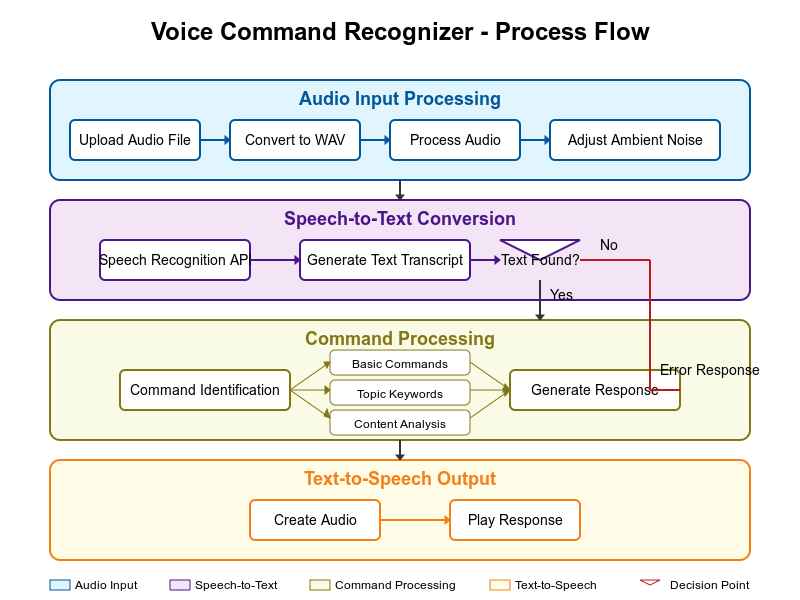

**We'll need to:**

1.   Capture audio input

1. Process the audio to extract speech
2. Convert speech to text

2.
Identify commands from the text








5.   Execute appropriate responses to those commands




**For Our Project we focus on:**



*  Capturing clear audio in a controlled environment

*   Converting speech to text using available libraries
*   Implementing basic command recognition (likely keyword-based)

*   Defining a set of simple commands and appropriate responses







# let's start implementation

**Install Required Libraries**

In [28]:
# Install required libraries
!pip install SpeechRecognition
!pip install gtts
!pip install pydub

**Set Up Audio File Processing**

In [29]:
import speech_recognition as sr
from google.colab import files
import io
import os
from pydub import AudioSegment

# Function to convert uploaded audio to WAV format if needed
def convert_to_wav(audio_file_path):
    # Get the file extension
    file_extension = os.path.splitext(audio_file_path)[1].lower()

    # If already WAV, no conversion needed
    if file_extension == '.wav':
        return audio_file_path

    # Convert to WAV
    audio = AudioSegment.from_file(audio_file_path)
    wav_file_path = os.path.splitext(audio_file_path)[0] + '.wav'
    audio.export(wav_file_path, format="wav")
    print(f"Converted {audio_file_path} to {wav_file_path}")
    return wav_file_path

print("Setup complete!")

Setup complete!


**Create the Speech Recognition Function**

In [30]:
def recognize_speech_from_file():
    # Create a recognizer instance
    recognizer = sr.Recognizer()

    # Upload an audio file
    print("Please upload an audio file with your voice command:")
    uploaded = files.upload()

    # Get the file name
    file_name = list(uploaded.keys())[0]

    # Convert to WAV if needed
    wav_file = convert_to_wav(file_name)

    # Process the audio file
    with sr.AudioFile(wav_file) as source:
        print("Processing audio...")
        # Adjust for ambient noise
        recognizer.adjust_for_ambient_noise(source)

        # Record the audio
        audio = recognizer.record(source)

        # Try to recognize the speech
        try:
            print("Recognizing speech...")
            text = recognizer.recognize_google(audio)
            print(f"Recognized text: '{text}'")
            return text
        except sr.UnknownValueError:
            print("Could not understand the audio")
            return ""
        except sr.RequestError as e:
            print(f"Error with the speech recognition service: {e}")
            return ""

**Create the Command Processor**

In [41]:
def process_command(text):
    if not text:
        return "No command detected."

    # Convert to lowercase for easier matching
    text = text.lower()

    # Check for standard commands first
    if "hello" in text or "hi" in text:
        return "Hello! How can I help you today?"

    elif "time" in text:
        import datetime
        current_time = datetime.datetime.now().strftime("%I:%M %p")
        return f"The current time is {current_time}"

    elif "date" in text:
        import datetime
        current_date = datetime.datetime.now().strftime("%B %d, %Y")
        return f"Today is {current_date}"

    elif "weather" in text:
        return "The weather today is sunny with a high of 75 degrees."

    # Check for keywords related to specific topics
    elif any(word in text for word in ["food", "eat", "taste", "cook", "recipe", "ham", "tacos", "pickle"]):
        return "I detect you're talking about food. Would you like a recipe recommendation?"

    elif any(word in text for word in ["health", "restore", "cold", "smell", "odor"]):
        return "I notice you mentioned some health-related terms. Would you like some wellness information?"

    elif len(text) > 50:  # If it's a long text but no specific commands
        return "I heard a detailed description, but I'm not sure what you'd like me to do. Try asking a specific question or giving a command."

    else:
        return f"I heard: '{text[:50]}...' but I'm not sure how to respond. Try asking about the time, weather, or say hello."

**Create a Text-to-Speech Function**

In [42]:
from gtts import gTTS
from IPython.display import Audio

def speak_response(response_text):
    print(f"Assistant: {response_text}")

    # Generate the speech
    tts = gTTS(text=response_text, lang='en')
    tts.save('response.mp3')

    # Play the audio
    return Audio('response.mp3', autoplay=True)

**Put It All Together**

In [47]:
def voice_command_assistant():
    # Step 1: Get the speech from the audio file
    recognized_text = recognize_speech_from_file()

    if recognized_text:
        # Step 2: Process the command
        response = process_command(recognized_text)

        # Step 3: Speak the response
        return speak_response(response)
    else:
        return speak_response("I couldn't understand any commands in that audio.")

# Run the assistant
voice_command_assistant()

Please upload an audio file with your voice command:


Saving test_music.mp3 to test_music (1).mp3
Converted test_music (1).mp3 to test_music (1).wav
Processing audio...
Recognizing speech...
Recognized text: 'music please'
Assistant: I heard: 'music please...' but I'm not sure how to respond. Try asking about the time, weather, or say hello.


**Test with Sample Commands**

In [38]:
def test_text_commands():
    print("Enter a command to test (or 'quit' to exit):")
    command = input()

    while command.lower() != 'quit':
        response = process_command(command)
        print(f"Response: {response}")
        speak_response(response)

        print("\nEnter another command (or 'quit' to exit):")
        command = input()

# Run the test function
test_text_commands()

Enter a command to test (or 'quit' to exit):
hii
Response: Hello! How can I help you today?
Assistant: Hello! How can I help you today?

Enter another command (or 'quit' to exit):
time
Response: The current time is 10:17 PM
Assistant: The current time is 10:17 PM

Enter another command (or 'quit' to exit):
date
Response: Today is April 25, 2025
Assistant: Today is April 25, 2025

Enter another command (or 'quit' to exit):
weather
Response: The weather today is sunny with a high of 75 degrees.
Assistant: The weather today is sunny with a high of 75 degrees.

Enter another command (or 'quit' to exit):
stop
Response: Music paused.
Assistant: Music paused.

Enter another command (or 'quit' to exit):
start
Response: I'm not sure how to respond to that command.
Assistant: I'm not sure how to respond to that command.

Enter another command (or 'quit' to exit):
thankyou
Response: I'm not sure how to respond to that command.
Assistant: I'm not sure how to respond to that command.

Enter another